## Bike Share Toronto Data (2018)

In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Bike Share Toronto data
b18_q1 = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/2018-Q1.csv")
b18_q2 = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/2018-Q2.csv")
b18_q3 = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/2018-Q3.csv")
b18_q4 = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/2018-Q4.csv")

In [3]:
toronto = [b18_q1, b18_q2, b18_q3, b18_q4]
bike_share = pd.concat(toronto)
bike_share.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [4]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922955 entries, 0 to 363489
Data columns (total 9 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   trip_id                int64 
 1   trip_duration_seconds  int64 
 2   from_station_id        int64 
 3   trip_start_time        object
 4   from_station_name      object
 5   trip_stop_time         object
 6   to_station_id          int64 
 7   to_station_name        object
 8   user_type              object
dtypes: int64(4), object(5)
memory usage: 146.7+ MB


In [5]:
# Convert trip_start_time and trip_stop_time to DateTime Format
cols = ['trip_start_time','trip_stop_time']
bike_share[cols] = bike_share[cols].apply(pd.to_datetime)

In [6]:
# Extract hour, month, and day from trip_start_time and trip_stop_time
bike_share['hour_start'] = bike_share['trip_start_time'].apply(lambda time: time.hour)
bike_share['month_start'] = bike_share['trip_start_time'].apply(lambda time: time.month)
bike_share['weekday_start'] = bike_share['trip_start_time'].apply(lambda time: time.dayofweek)

In [7]:
bike_share['hour_stop'] = bike_share['trip_stop_time'].apply(lambda time: time.hour)
bike_share['month_stop'] = bike_share['trip_stop_time'].apply(lambda time: time.month)
bike_share['weekday_stop'] = bike_share['trip_stop_time'].apply(lambda time: time.dayofweek)

In [8]:
bike_share.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,0,1,0,0,1,0
1,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,0,1,0,1,1,0
2,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,0,1,0,0,1,0
3,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,0,1,0,1,1,0
4,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,1,1,0,1,1,0


In [9]:
# For clarity, assign month number to month and day number to day
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share['month_start'] = bike_share['month_start'].map(mon)
bike_share['month_stop'] = bike_share['month_stop'].map(mon)

In [10]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share['weekday_start'] = bike_share['weekday_start'].map(day)
bike_share['weekday_stop'] = bike_share['weekday_stop'].map(day)

In [11]:
bike_share.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,0,Jan,Mon,0,Jan,Mon
1,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,0,Jan,Mon,1,Jan,Mon
2,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,0,Jan,Mon,0,Jan,Mon
3,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,0,Jan,Mon,1,Jan,Mon
4,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,1,Jan,Mon,1,Jan,Mon


In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
bike_share.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id,hour_start,hour_stop
count,1922955.000,1922955.000,1922955.000,1922955.000,1922955.000,1922955.000
mean,3490799.282,962.976,7134.140,7133.976,14.157,14.329
std,624895.735,1595.530,103.423,103.546,4.865,4.933
min,2383648.000,60.000,7000.000,7000.000,0.000,0.000
25%,2955251.500,422.000,7042.000,7042.000,10.000,10.000
50%,3494072.000,670.000,7109.000,7107.000,15.000,15.000
75%,4027557.500,1051.000,7222.000,7222.000,18.000,18.000
max,4581277.000,55077.000,7391.000,7391.000,23.000,23.000


### Visualize Data

[Text(0, 0, '1572980 (82%)'), Text(0, 0, '349975 (18%)')]

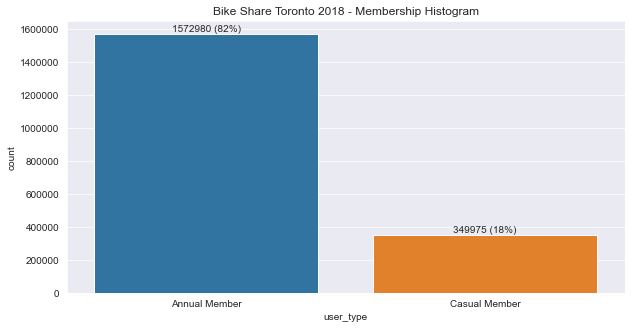

In [13]:
# Membership histogram
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax = sns.countplot(x='user_type',data=bike_share)
plt.title('Bike Share Toronto 2018 - Membership Histogram')
plt.ticklabel_format(style='plain', axis='y')

abs_values = bike_share['user_type'].value_counts(ascending=False)
rel_values = bike_share['user_type'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

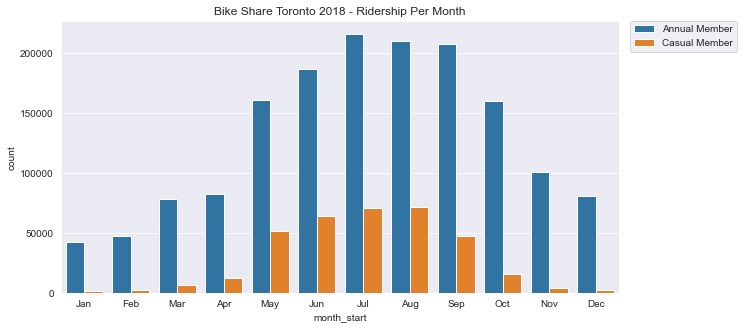

In [14]:
# Ridership per month
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share, x='month_start', hue='user_type')
plt.title('Bike Share Toronto 2018 - Ridership Per Month')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [15]:
# Order month by ridership
trips_month = bike_share.groupby(['month_start'])['trip_id'].count().reset_index()
trips_month.sort_values(by=['trip_id'], ascending =False).reset_index(drop=True)

,month_start,trip_id
0,Jul,286316
1,Aug,281219
2,Sep,255001
3,Jun,250837
4,May,212750
5,Oct,175879
6,Nov,104287
7,Apr,94783
8,Mar,84969
9,Dec,83324


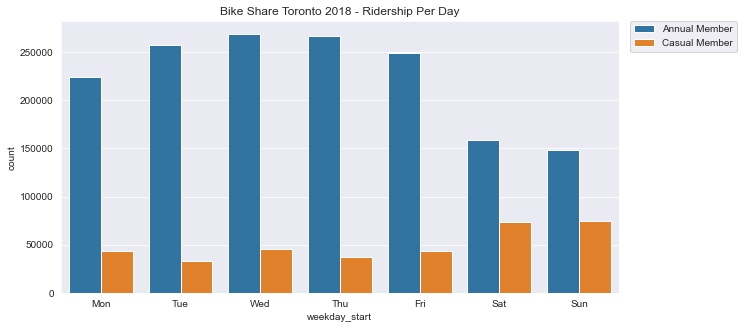

In [16]:
# Ridership per day of week
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share, x='weekday_start', hue='user_type')
plt.title('Bike Share Toronto 2018 - Ridership Per Day')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

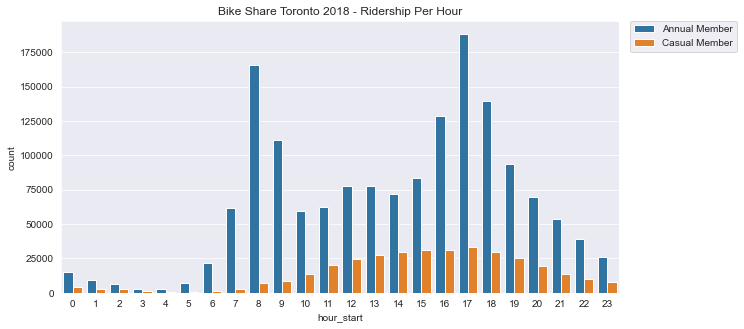

In [17]:
#Ridership per hour of day
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share, x='hour_start', hue='user_type')
plt.title('Bike Share Toronto 2018 - Ridership Per Hour')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Top 10 Departing Stations - Annual Members')

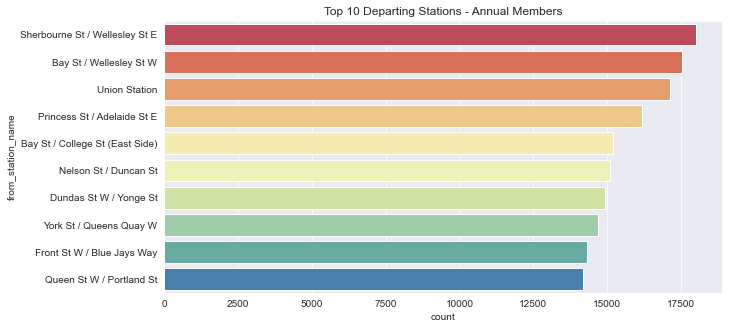

In [19]:
# Top 10 departing stations - Annual Members
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['user_type']=='Annual Member']['from_station_name'],data=bike_share, palette='Spectral', order=bike_share[bike_share['user_type']=='Annual Member']['from_station_name'].value_counts().index[:10])
plt.title('Top 10 Departing Stations - Annual Members')

Text(0.5, 1.0, 'Top 10 Arriving Stations - Annual Members')

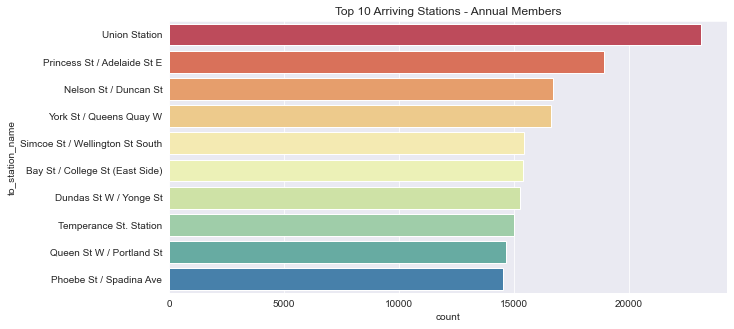

In [20]:
# Top 10 arriving stations - Annual Members
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['user_type']=='Annual Member']['to_station_name'],data=bike_share, palette='Spectral',order=bike_share[bike_share['user_type']=='Annual Member']['to_station_name'].value_counts().index[:10])
plt.title('Top 10 Arriving Stations - Annual Members')

Text(0.5, 1.0, 'Top 10 Departing Stations - Casual Members')

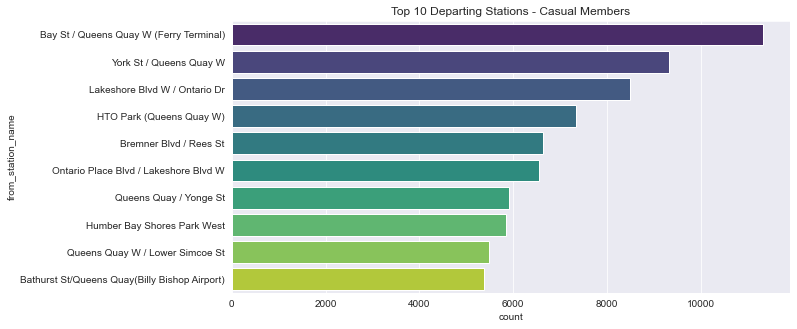

In [21]:
# Top 10 departing stations - Casual Members
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['user_type']=='Casual Member']['from_station_name'],data=bike_share, palette='viridis',order=bike_share[bike_share['user_type']=='Casual Member']['from_station_name'].value_counts().index[:10])
plt.title('Top 10 Departing Stations - Casual Members')

Text(0.5, 1.0, 'Top 10 Arriving Stations - Casual Members')

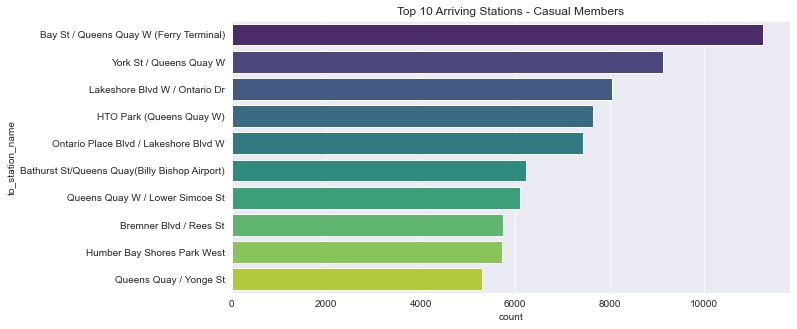

In [22]:
# Top 10 arriving stations - Casual Members
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['user_type']=='Casual Member']['to_station_name'],data=bike_share, palette='viridis',order=bike_share[bike_share['user_type']=='Casual Member']['to_station_name'].value_counts().index[:10])
plt.title('Top 10 Arriving Stations - Casual Members')

In [23]:
correlation = bike_share.corr()
correlation

,trip_id,trip_duration_seconds,from_station_id,to_station_id,hour_start,hour_stop
trip_id,1.000,-0.036,0.138,0.140,-0.011,-0.013
trip_duration_seconds,-0.036,1.000,0.030,0.039,0.023,0.071
from_station_id,0.138,0.030,1.000,0.121,-0.005,-0.002
to_station_id,0.140,0.039,0.121,1.000,0.043,0.045
hour_start,-0.011,0.023,-0.005,0.043,1.000,0.953
hour_stop,-0.013,0.071,-0.002,0.045,0.953,1.000


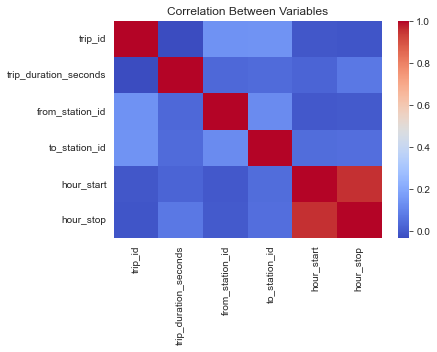

In [24]:
sns.heatmap(correlation, cmap="coolwarm")
plt.title('Correlation Between Variables')
plt.show()

In [33]:
# Correlation between numeric features
features = list(['trip_duration_seconds', 'hour_start', 'hour_stop'])

In [37]:
correlation = bike_share[features].corr()
correlation

,trip_duration_seconds,hour_start,hour_stop
trip_duration_seconds,1.000,0.023,0.071
hour_start,0.023,1.000,0.953
hour_stop,0.071,0.953,1.000


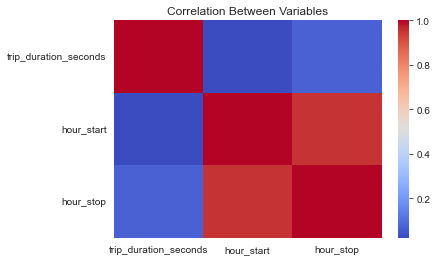

In [38]:
sns.heatmap(correlation, cmap="coolwarm")
plt.title('Correlation Between Variables')
plt.show()

Text(0.5, 1.0, 'Total Trip Duration per Day')

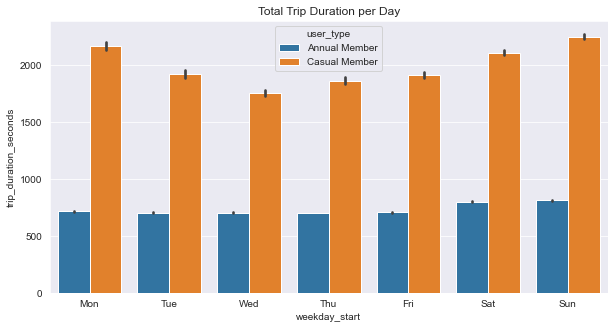

In [50]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax = sns.barplot(x="weekday_start", y="trip_duration_seconds", hue="user_type", data=bike_share)
plt.title('Total Trip Duration per Day')

In [56]:
bike_share.groupby(['user_type','weekday_start']).mean()

trip_duration_seconds  hour_start  hour_stop
user_type     weekday_start                                              
Annual Member Fri                          705.424      13.706     13.820
              Mon                          715.412      13.999     14.144
              Sat                          799.589      14.156     14.267
              Sun                          812.242      14.229     14.379
              Thu                          700.876      13.798     13.930
              Tue                          702.478      14.045     14.191
              Wed                          704.494      14.018     14.162
Casual Member Fri                         1913.487      15.103     15.308
              Mon                         2167.160      14.725     15.146
              Sat                         2108.017      15.070     15.411
              Sun                         2250.826      14.706     15.137
              Thu                         1863.881      15.013     15.315
              Tue                         1923.574      15.102     15.432
              Wed                         1756.100      15.539     15.790

Text(0.5, 1.0, 'Total Trip Duration per Month')

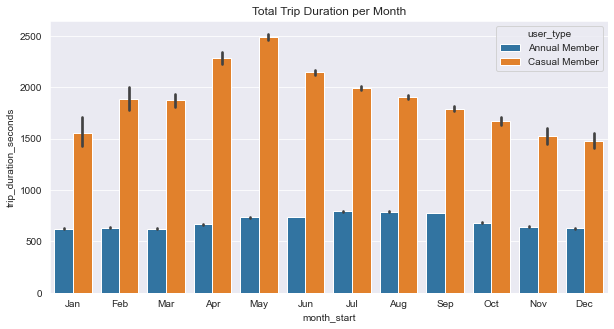

In [51]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax = sns.barplot(x="month_start", y="trip_duration_seconds", hue="user_type", data=bike_share)
plt.title('Total Trip Duration per Month')

In [55]:
bike_share.groupby(['user_type','month_start']).mean()

trip_duration_seconds  hour_start  hour_stop
user_type     month_start                                              
Annual Member Apr                        666.784      13.812     13.957
              Aug                        790.063      14.130     14.266
              Dec                        628.269      13.651     13.773
              Feb                        635.747      13.818     13.943
              Jan                        624.494      13.540     13.668
              Jul                        795.592      14.127     14.258
              Jun                        739.028      14.129     14.253
              Mar                        623.546      13.745     13.875
              May                        736.800      14.111     14.251
              Nov                        641.766      13.606     13.730
              Oct                        683.949      13.893     14.034
              Sep                        776.161      14.001     14.150
Casual Member Apr                       2283.854      14.836     15.384
              Aug                       1903.410      15.056     15.345
              Dec                       1481.005      14.028     14.298
              Feb                       1888.351      14.615     14.944
              Jan                       1557.003      13.940     14.104
              Jul                       1994.718      15.150     15.425
              Jun                       2145.572      15.281     15.602
              Mar                       1872.472      14.576     14.972
              May                       2489.744      15.041     15.526
              Nov                       1529.281      13.799     14.096
              Oct                       1670.914      14.521     14.848
              Sep                       1794.024      14.807     15.118

Text(0.5, 1.0, 'Total Trip Duration per Hour')

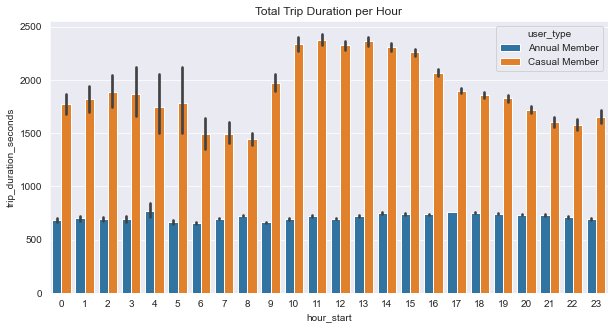

In [52]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax = sns.barplot(x="hour_start", y="trip_duration_seconds", hue="user_type", data=bike_share)
plt.title('Total Trip Duration per Hour')

In [58]:
bike_share.groupby(['user_type']).mean()

,trip_duration_seconds,hour_start,hour_stop
user_type,,,
Annual Member,725.017,13.967,14.102
Casual Member,2032.496,15.012,15.348


Text(0.5, 1.0, 'Boxplot - Trip Duration')

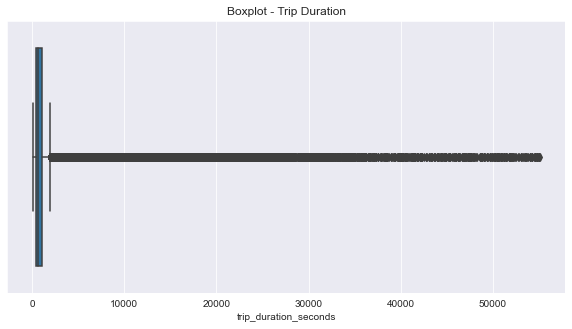

In [57]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax = sns.boxplot(x=bike_share["trip_duration_seconds"])
plt.title('Boxplot - Trip Duration')

## Toronto Weather Data (2018)

In [59]:
# Load cleaned weather data
weather = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/Weather 2018/weather_cleaned.csv")

In [60]:
weather.head()

,Unnamed: 0,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Fog,Freezing Rain,Haze,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
0,0,2018-01-01 00:00:00,-16.200,-20.500,70.000,16.100,102.130,0.000,-22.000,0,0,0,0,0,0,0,0,0,0
1,1,2018-01-01 01:00:00,-16.800,-21.100,70.000,16.100,102.100,0.000,-20.000,0,0,0,0,0,0,0,0,0,0
2,2,2018-01-01 02:00:00,-17.300,-20.800,75.000,16.100,102.150,0.000,-26.000,0,0,0,0,0,0,0,0,0,0
3,3,2018-01-01 03:00:00,-17.900,-21.600,73.000,16.100,102.130,0.000,-24.000,0,0,0,0,0,0,0,0,0,0
4,4,2018-01-01 04:00:00,-17.200,-21.100,72.000,16.100,102.090,0.000,-21.000,0,0,0,0,0,0,0,0,0,0


In [61]:
weather.drop(['Unnamed: 0'], axis=1, inplace=True)

In [62]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date/Time            8760 non-null   object 
 1   Temp (°C)            8760 non-null   float64
 2   Dew Point Temp (°C)  8760 non-null   float64
 3   Rel Hum (%)          8760 non-null   float64
 4   Visibility (km)      8760 non-null   float64
 5   Stn Press (kPa)      8760 non-null   float64
 6   Hmdx                 8760 non-null   float64
 7   Wind Chill           8760 non-null   float64
 8   Strong Wind          8760 non-null   int64  
 9   Fog                  8760 non-null   int64  
 10  Freezing Rain        8760 non-null   int64  
 11  Haze                 8760 non-null   int64  
 12  Heavy Rain           8760 non-null   int64  
 13  Moderate Rain        8760 non-null   int64  
 14  Moderate Snow        8760 non-null   int64  
 15  Rain                 8760 non-null   i

### Visualize Data

Text(0.5, 1.0, 'Toronto Weather Data 2018 - Temperature (°C) Histogram')

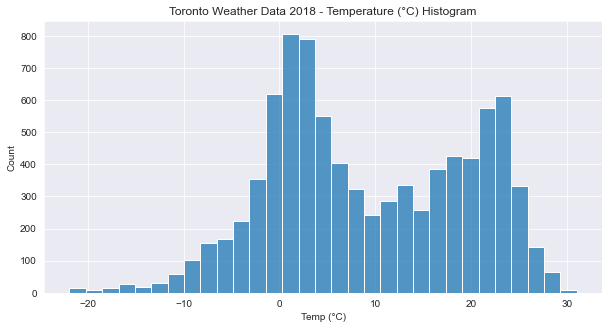

In [63]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(data=weather, x="Temp (°C)")
plt.title('Toronto Weather Data 2018 - Temperature (°C) Histogram')

Text(0.5, 1.0, 'Toronto Weather Data 2018 - Dew Point Temp (°C) Histogram')

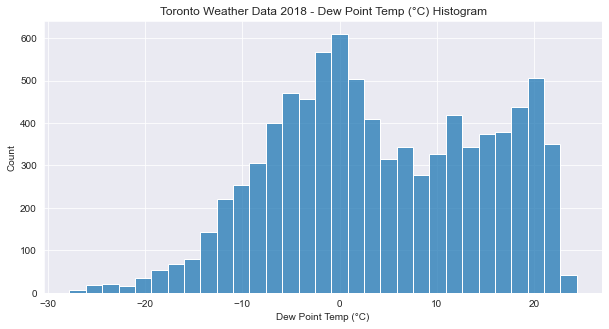

In [64]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(data=weather, x="Dew Point Temp (°C)")
plt.title('Toronto Weather Data 2018 - Dew Point Temp (°C) Histogram')

Text(0.5, 1.0, 'Toronto Weather Data 2018 - Relative Humidty (%) Histogram')

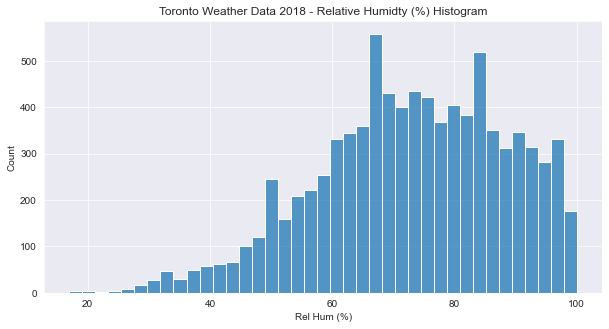

In [65]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(data=weather, x="Rel Hum (%)")
plt.title('Toronto Weather Data 2018 - Relative Humidty (%) Histogram')

Text(0.5, 1.0, 'Toronto Weather Data 2018 - Visibility (km) Histogram')

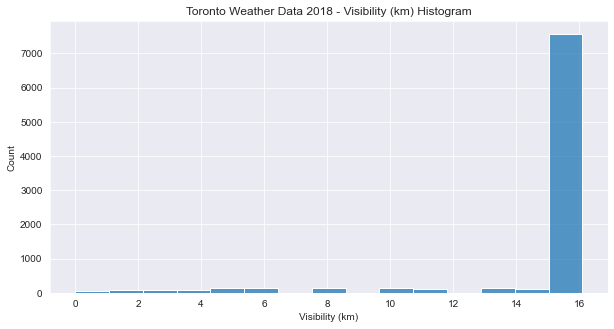

In [66]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(data=weather, x="Visibility (km)")
plt.title('Toronto Weather Data 2018 - Visibility (km) Histogram')

Text(0.5, 1.0, 'Toronto Weather Data 2018 - Station Pressure (kPa) Histogram')

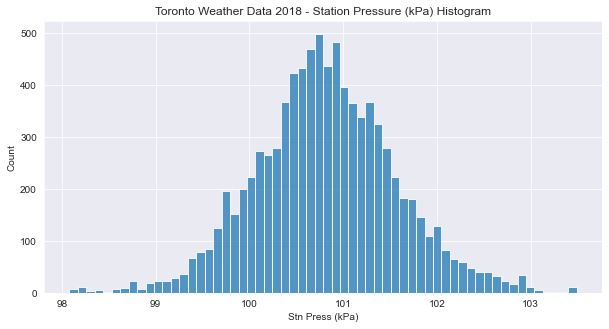

In [67]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(data=weather, x="Stn Press (kPa)")
plt.title('Toronto Weather Data 2018 - Station Pressure (kPa) Histogram')

Text(0.5, 1.0, 'Toronto Weather Data 2018 - Humidex Histogram')

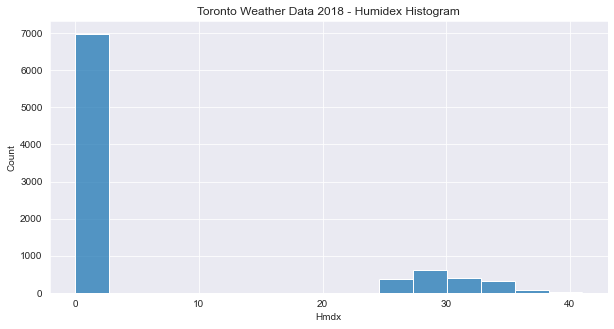

In [68]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(data=weather, x="Hmdx")
plt.title('Toronto Weather Data 2018 - Humidex Histogram')

Text(0.5, 1.0, 'Toronto Weather Data 2018 - Wind Chill Histogram')

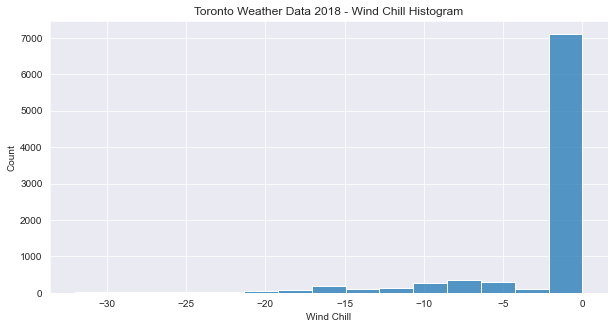

In [69]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(data=weather, x="Wind Chill")
plt.title('Toronto Weather Data 2018 - Wind Chill Histogram')

In [70]:
weather[['Fog', 'Freezing Rain', 'Haze', 'Heavy Rain', 'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms']].describe()

,Fog,Freezing Rain,Haze,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
count,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000
mean,0.069,0.001,0.003,0.001,0.003,0.000,0.081,0.039,0.002
std,0.253,0.032,0.052,0.032,0.051,0.011,0.273,0.195,0.043
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [71]:
# Boolean counts/occurrences for last 9 features (Strong wind - Thunderstorms)
(weather == True).sum()

Date/Time                0
Temp (°C)               53
Dew Point Temp (°C)     21
Rel Hum (%)              0
Visibility (km)          9
Stn Press (kPa)          0
Hmdx                     0
Wind Chill               0
Strong Wind             16
Fog                    602
Freezing Rain            9
Haze                    24
Heavy Rain               9
Moderate Rain           23
Moderate Snow            1
Rain                   712
Snow                   346
Thunderstorms           16
dtype: int64

In [72]:
weather_correlation = weather.corr()
weather_correlation

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Fog,Freezing Rain,Haze,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
Temp (°C),1.000,0.951,0.114,0.088,-0.253,0.697,0.634,-0.032,-0.010,-0.031,0.036,0.038,0.019,-0.014,-0.043,-0.243,0.053
Dew Point Temp (°C),0.951,1.000,0.410,-0.034,-0.322,0.686,0.631,-0.020,0.095,-0.018,0.039,0.047,0.035,-0.010,0.045,-0.197,0.059
Rel Hum (%),0.114,0.410,1.000,-0.430,-0.316,0.132,0.188,0.041,0.391,0.039,0.017,0.039,0.061,0.013,0.309,0.094,0.031
Visibility (km),0.088,-0.034,-0.430,1.000,0.138,0.058,-0.007,-0.087,-0.794,-0.043,-0.122,-0.099,-0.114,-0.047,-0.323,-0.290,-0.030
Stn Press (kPa),-0.253,-0.322,-0.316,0.138,1.000,-0.106,-0.317,-0.034,-0.158,-0.017,0.013,-0.018,-0.043,0.007,-0.235,0.013,-0.030
Hmdx,0.697,0.686,0.132,0.058,-0.106,1.000,0.209,-0.021,-0.034,-0.016,0.055,0.056,-0.010,-0.005,-0.095,-0.102,0.069
Wind Chill,0.634,0.631,0.188,-0.007,-0.317,0.209,1.000,-0.030,0.106,-0.034,0.002,0.013,0.021,-0.016,0.123,-0.281,0.018
Strong Wind,-0.032,-0.020,0.041,-0.087,-0.034,-0.021,-0.030,1.000,0.062,0.332,-0.002,-0.001,-0.002,-0.000,0.026,0.074,-0.002
Fog,-0.010,0.095,0.391,-0.794,-0.158,-0.034,0.106,0.062,1.000,0.048,-0.014,0.118,0.145,-0.003,0.358,-0.055,0.041
Freezing Rain,-0.031,-0.018,0.039,-0.043,-0.017,-0.016,-0.034,0.332,0.048,1.000,-0.002,-0.001,-0.002,-0.000,-0.010,0.030,-0.001


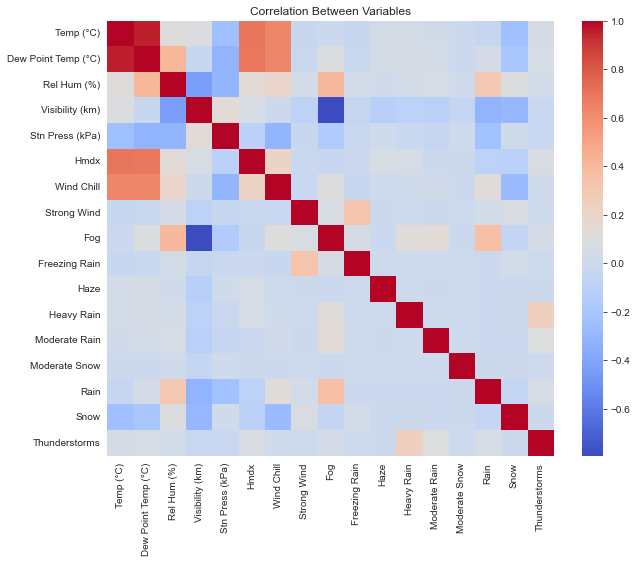

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(weather_correlation, cmap="coolwarm")
plt.title('Correlation Between Variables')
plt.show()

## Combined Data

In [74]:
# Load cleaned combined data
df = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/bikeshare_weather_joined.csv")

In [75]:
df.head()

,Unnamed: 0,date,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,...,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday,hour,month
0,0,2018-01-01 00:00:00,4,-16.200,-20.500,70.000,16.100,102.130,0.000,-22.000,...,0,0,0,0,0,0,0,1,0,1
1,1,2018-01-01 01:00:00,10,-16.800,-21.100,70.000,16.100,102.100,0.000,-20.000,...,0,0,0,0,0,0,0,1,1,1
2,2,2018-01-01 02:00:00,6,-17.300,-20.800,75.000,16.100,102.150,0.000,-26.000,...,0,0,0,0,0,0,0,1,2,1
3,3,2018-01-01 03:00:00,14,-17.900,-21.600,73.000,16.100,102.130,0.000,-24.000,...,0,0,0,0,0,0,0,1,3,1
4,4,2018-01-01 04:00:00,6,-17.200,-21.100,72.000,16.100,102.090,0.000,-21.000,...,0,0,0,0,0,0,0,1,4,1


In [76]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [77]:
df_correlation = df.corr()
df_correlation

,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Fog,...,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday,hour,month
trips,1.000,0.532,0.439,-0.164,0.157,-0.067,0.410,0.260,-0.030,-0.120,...,-0.005,-0.033,-0.007,-0.134,-0.124,0.017,-0.067,-0.039,0.333,0.161
Temp (°C),0.532,1.000,0.951,0.114,0.088,-0.250,0.698,0.630,-0.033,-0.010,...,0.038,0.019,-0.014,-0.044,-0.241,0.053,-0.005,0.014,0.063,0.302
Dew Point Temp (°C),0.439,0.951,1.000,0.411,-0.034,-0.319,0.686,0.628,-0.020,0.095,...,0.047,0.035,-0.010,0.044,-0.196,0.059,-0.008,0.020,0.012,0.329
Rel Hum (%),-0.164,0.114,0.411,1.000,-0.430,-0.316,0.132,0.188,0.041,0.391,...,0.039,0.061,0.013,0.308,0.094,0.031,-0.007,0.021,-0.145,0.158
Visibility (km),0.157,0.088,-0.034,-0.430,1.000,0.137,0.058,-0.007,-0.087,-0.796,...,-0.100,-0.114,-0.048,-0.323,-0.289,-0.030,0.018,0.004,0.023,0.074
Stn Press (kPa),-0.067,-0.250,-0.319,-0.316,0.137,1.000,-0.105,-0.314,-0.034,-0.158,...,-0.018,-0.043,0.007,-0.234,0.012,-0.030,0.091,0.091,-0.018,-0.082
Hmdx,0.410,0.698,0.686,0.132,0.058,-0.105,1.000,0.208,-0.022,-0.034,...,0.056,-0.010,-0.005,-0.095,-0.101,0.069,-0.008,0.074,0.060,0.165
Wind Chill,0.260,0.630,0.628,0.188,-0.007,-0.314,0.208,1.000,-0.031,0.105,...,0.013,0.021,-0.016,0.122,-0.280,0.018,0.023,-0.002,0.039,0.376
Strong Wind,-0.030,-0.033,-0.020,0.041,-0.087,-0.034,-0.022,-0.031,1.000,0.063,...,-0.001,-0.002,-0.000,0.026,0.075,-0.002,0.082,-0.008,0.031,-0.031
Fog,-0.120,-0.010,0.095,0.391,-0.796,-0.158,-0.034,0.105,0.063,1.000,...,0.118,0.145,-0.003,0.357,-0.055,0.041,-0.012,0.008,-0.042,-0.011


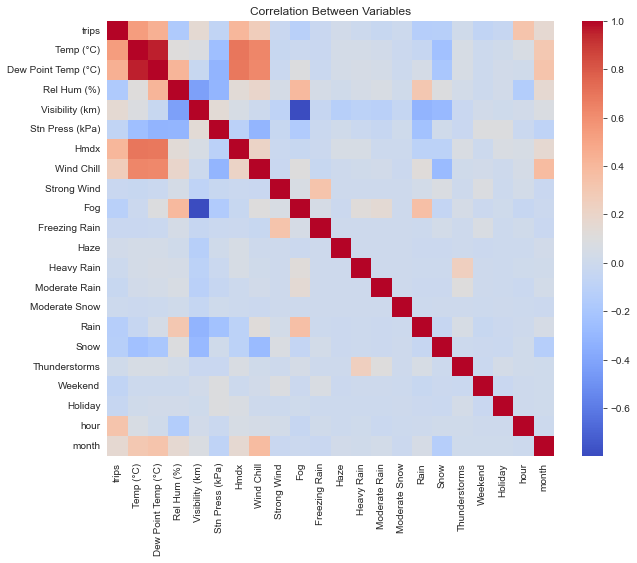

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df_correlation, cmap="coolwarm")
plt.title('Correlation Between Variables')
plt.show()
# Can see that trips are highly correlated to temperature, dew point, and humidex

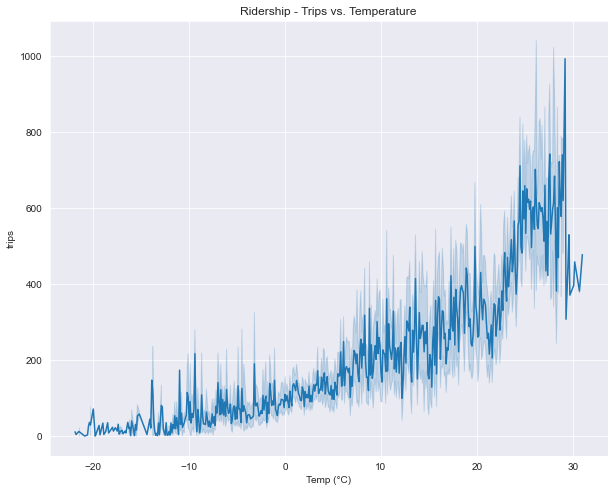

In [79]:
# Plot trips vs temperature
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="Temp (°C)", y="trips")
plt.title('Ridership - Trips vs. Temperature')
plt.show()

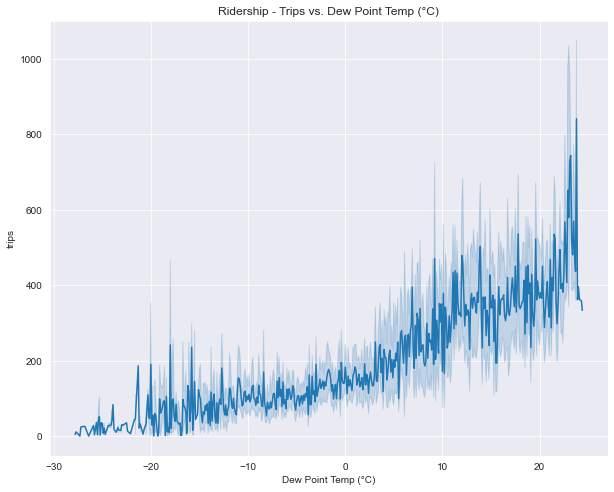

In [80]:
# Plot trips vs dew point
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="Dew Point Temp (°C)", y="trips")
plt.title('Ridership - Trips vs. Dew Point Temp (°C)')
plt.show()

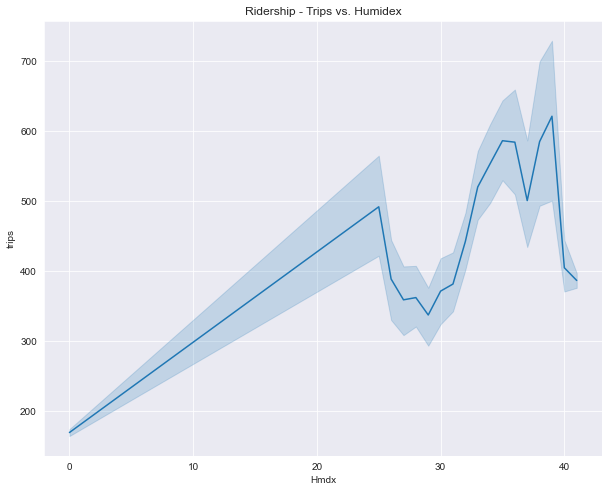

In [81]:
# Plot trips vs humidex
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="Hmdx", y="trips")
plt.title('Ridership - Trips vs. Humidex')
plt.show()

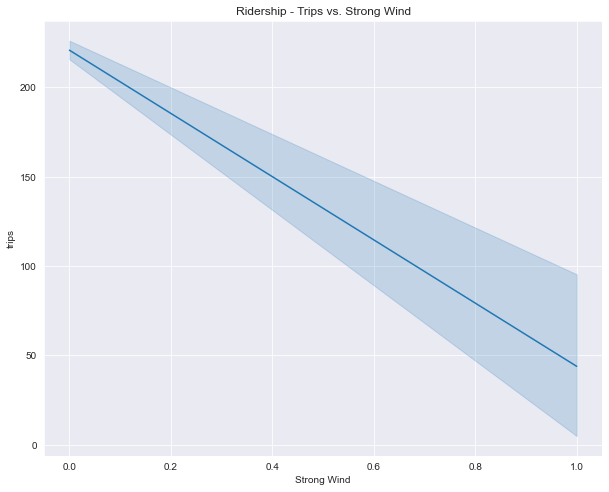

In [91]:
# Plot trips vs strong wind
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="Strong Wind", y="trips")
plt.title('Ridership - Trips vs. Strong Wind')
plt.show()

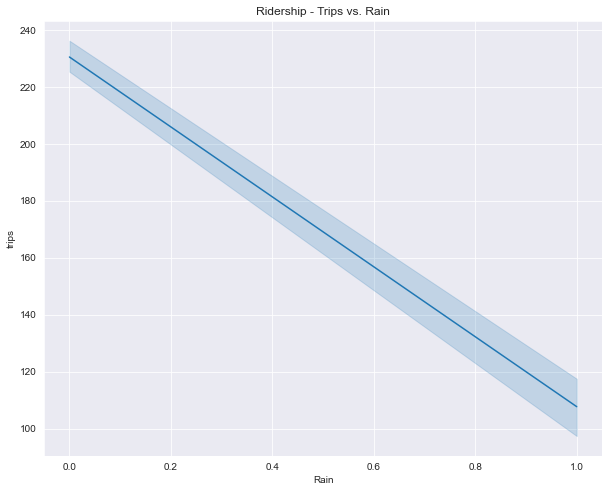

In [95]:
# Plot trips vs rain
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="Rain", y="trips")
plt.title('Ridership - Trips vs. Rain')
plt.show()

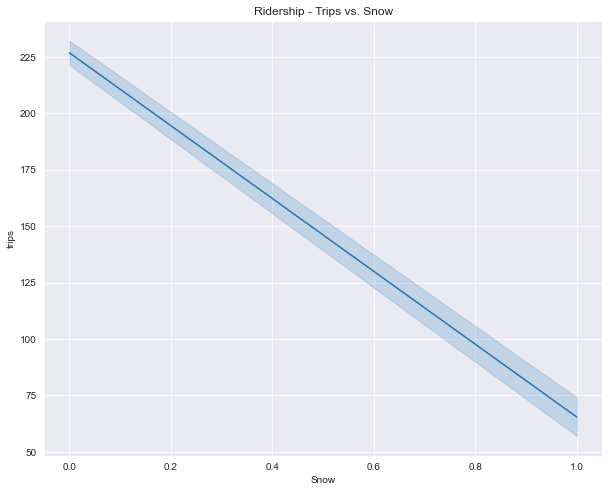

In [94]:
# Plot trips vs snow
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="Snow", y="trips")
plt.title('Ridership - Trips vs. Snow')
plt.show()

Text(0.5, 1.0, 'Temp (°C), Dew Point Temp (°C), Hmdx')

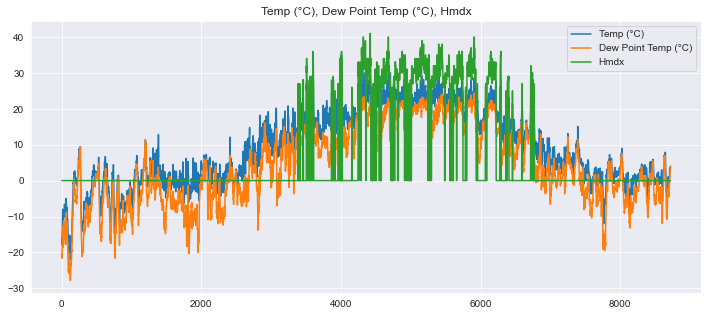

In [115]:
df[['Temp (°C)', 'Dew Point Temp (°C)', 'Hmdx']].plot(figsize=(12, 5))
plt.title('Temp (°C), Dew Point Temp (°C), Hmdx')

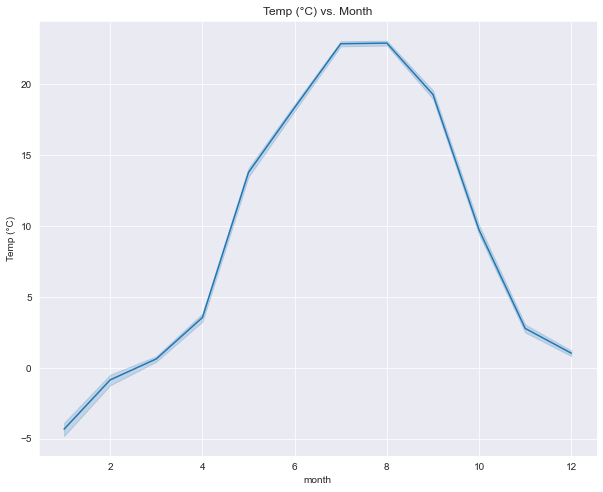

In [114]:
# Plot Temp (°C) vs. Month
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x="month", y="Temp (°C)")
plt.title('Temp (°C) vs. Month')
plt.show()

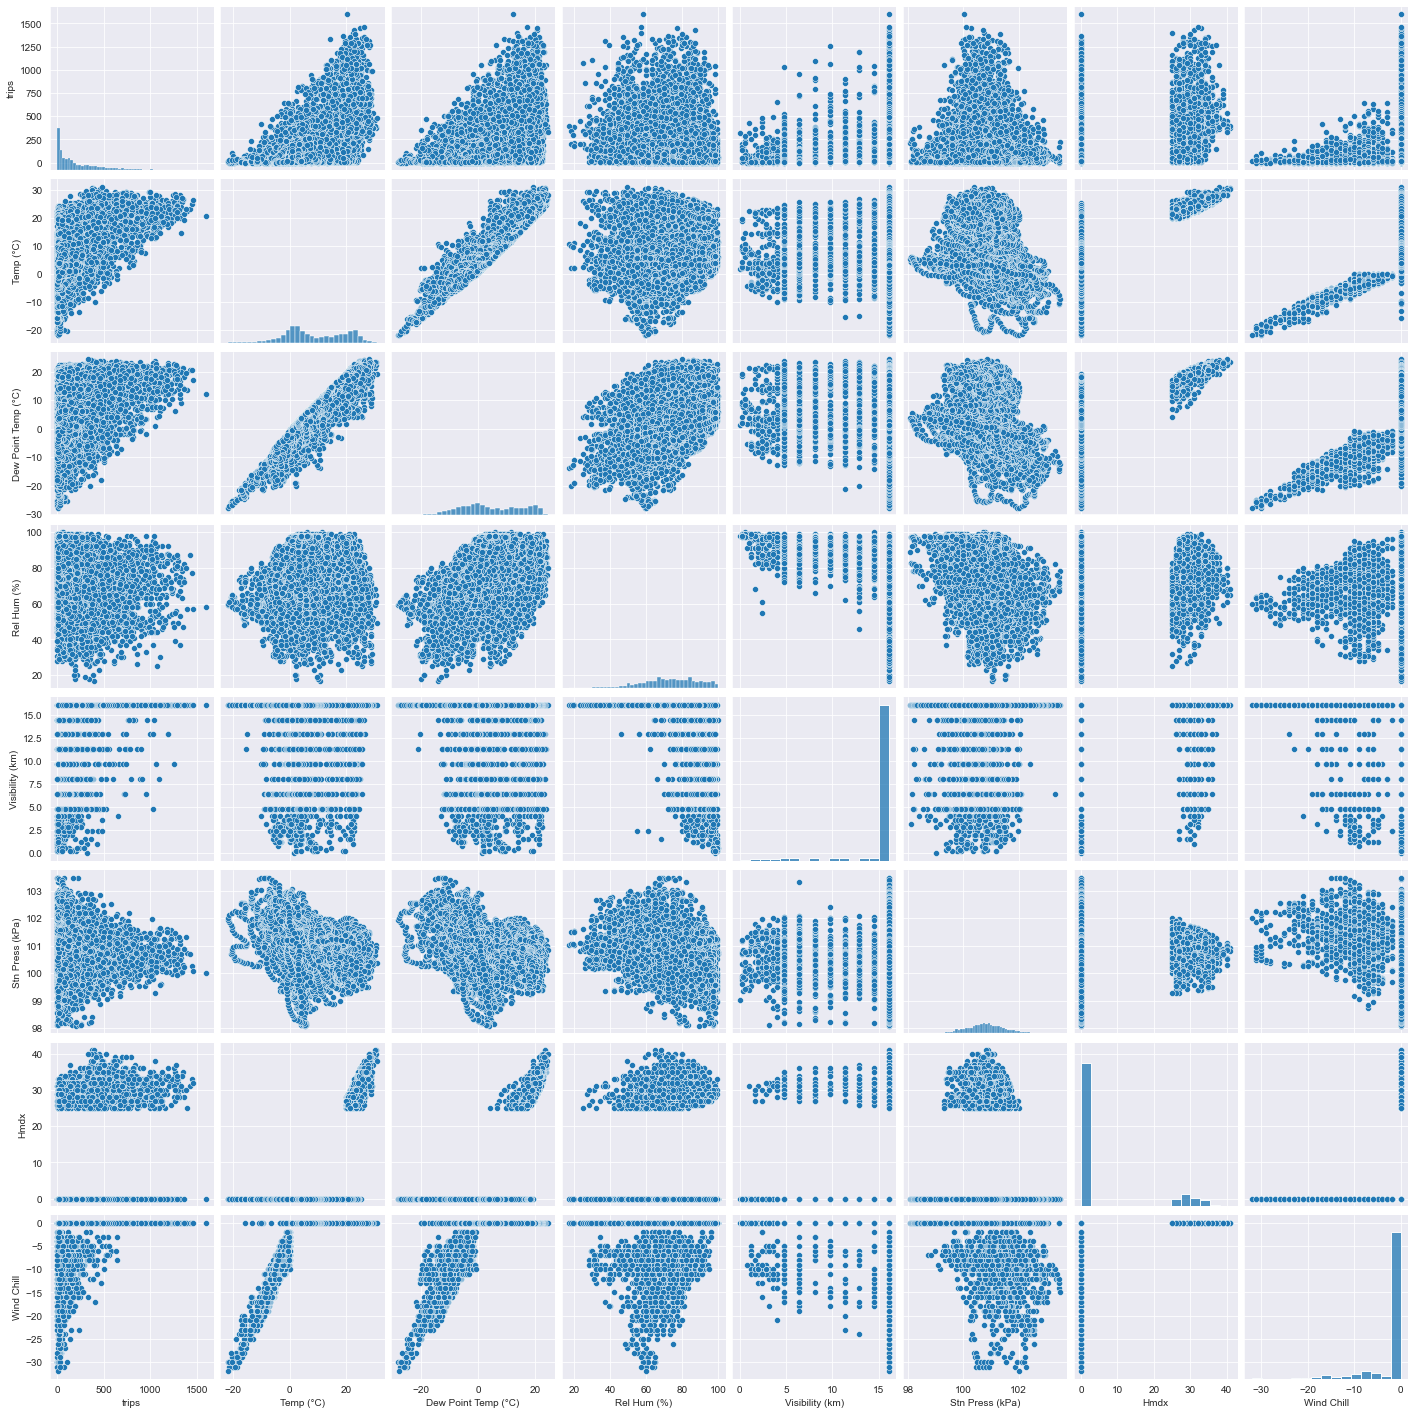

In [108]:
# Pairplot numeric variables
sns.pairplot(df, vars=['trips','Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)','Visibility (km)','Stn Press (kPa)','Hmdx','Wind Chill'])

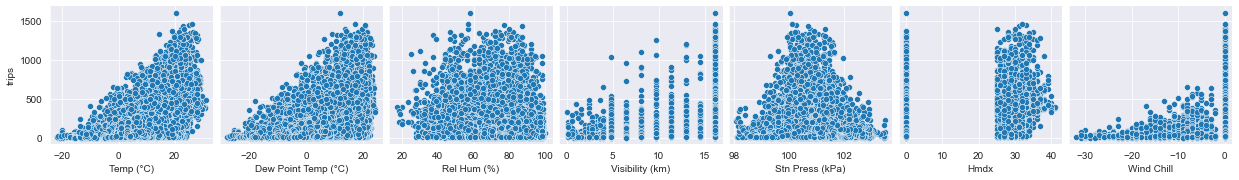

In [109]:
# Plot numeric variables against trips
sns.pairplot(df, 
             y_vars=['trips'],
             x_vars=['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)','Visibility (km)','Stn Press (kPa)','Hmdx','Wind Chill'])

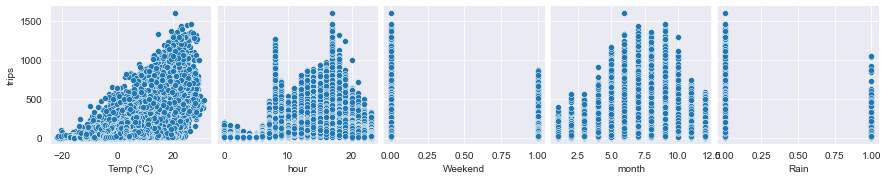

In [112]:
# Based on permutation importance results
sns.pairplot(df, 
             y_vars=['trips'],
             x_vars=['Temp (°C)', 'hour', 'Weekend','month','Rain'])

Text(0.5, 1.0, 'Boxplot - Temp (°C)')

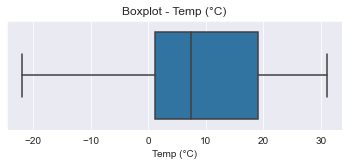

In [120]:
plt.figure(figsize=(6,2))
sns.set_style('darkgrid')
ax = sns.boxplot(x=df["Temp (°C)"])
plt.title('Boxplot - Temp (°C)')

Text(0.5, 1.0, 'Boxplot - Dew Point Temp (°C)')

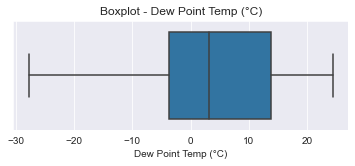

In [121]:
plt.figure(figsize=(6,2))
sns.set_style('darkgrid')
ax = sns.boxplot(x=df["Dew Point Temp (°C)"])
plt.title('Boxplot - Dew Point Temp (°C)')

Text(0.5, 1.0, 'Boxplot - Rel Hum (%)')

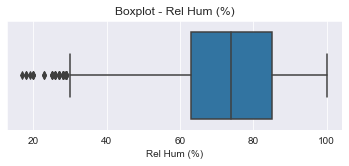

In [122]:
plt.figure(figsize=(6,2))
sns.set_style('darkgrid')
ax = sns.boxplot(x=df["Rel Hum (%)"])
plt.title('Boxplot - Rel Hum (%)')

Text(0.5, 1.0, 'Boxplot - Visibility (km)')

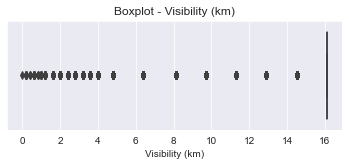

In [124]:
plt.figure(figsize=(6,2))
sns.set_style('darkgrid')
ax = sns.boxplot(x=df["Visibility (km)"])
plt.title('Boxplot - Visibility (km)')

Text(0.5, 1.0, 'Boxplot - Stn Press (kPa)')

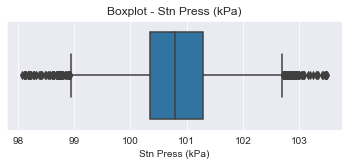

In [127]:
plt.figure(figsize=(6,2))
sns.set_style('darkgrid')
ax = sns.boxplot(x=df["Stn Press (kPa)"])
plt.title('Boxplot - Stn Press (kPa)')

Text(0.5, 1.0, 'Boxplot - Hmdx')

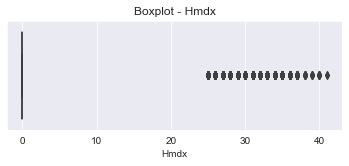

In [128]:
plt.figure(figsize=(6,2))
sns.set_style('darkgrid')
ax = sns.boxplot(x=df["Hmdx"])
plt.title('Boxplot - Hmdx')

Text(0.5, 1.0, 'Boxplot - Wind Chill')

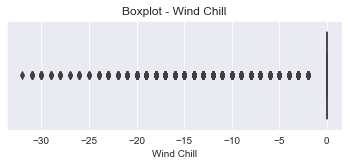

In [129]:
plt.figure(figsize=(6,2))
sns.set_style('darkgrid')
ax = sns.boxplot(x=df["Wind Chill"])
plt.title('Boxplot - Wind Chill')